# TO DO STILL
- RUNS ALL GRAPHS (& fix minor stuff if needed)
- analysis of each graph
- trier graphs
- finir visualization : séparer preprocessing / graphe (où mettre preprocessing ?) - JU
- remove magic values

# ENVOYER NOUVEAU FICHIER JSON À COCO

# **ADApocalypse present :** "What do we do now ?"

## Project Initialisation

### Import libraries

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from tqdm import tqdm
tqdm.pandas()
import json
from collections import defaultdict
#from transformers import pipeline
import ast
import re
import plotly.express as px
import plotly.graph_objects as go

# from sklearn.model_selection import train_test_split
# from skle
# 
# arn.metrics import accuracy_score, precision_score, recall_score, f1_score
# from sklearn.preprocessing import StandardScaler
# from statsmodels import tools
# from sklearn.linear_model import LogisticRegression
# from sklearn.tree import DecisionTreeClassifier, plot_tree
# from sklearn.metrics import mean_squared_error
# from sklearn.metrics import mean_absolute_error
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import confusion_matrix
# import seaborn as sns

# import folium
# import geopandas as gpd
# from folium import Choropleth, CircleMarker, Popup

# not displaying warnings
pd.options.mode.chained_assignment = None 

# to facilitate the use of py files
%load_ext autoreload
%autoreload 2



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
from src.data.data_loader import *
from src.data.data_transformer import *
from src.utils.visualization import *
from src.utils.methods import *

### Constants

In [7]:
COLOR_MALE = '#636EFA'
COLOR_FEMALE = '#EF553B'
COLOR_PALETTE = [COLOR_MALE, COLOR_FEMALE]

# 1. Loading file

We processed the data of each dataframe (detail in src/data/data_transformer) and computed the following functions once in order to generate the csv file :
- preprocess_movie_metadata()
- preprocess_char_metadata()
- preprocess_imdb_ratings(movies_metadata_df)
- preprocess_plot_emotions()

We applied the following rules to filter and preprocess the files: 
- all movies without release date were dropped
- all movies with a release date outside of the range 1910-2013 were dropped
- the release date were standardized into realase year
- thanks to another external dataset the missing gender were added
- the characters without a gender were dropped 

In order to fully understand the details behind the preprocessing, we refer you to the additional comments of each function definition and P2.
Then we compiled all of the data within 1 file thanks to the function preprocess_movies_complete(from_files).

We imported and transformed external datasets collected from different websites regarding :
- Bechdel Test API with preprocess_bechdel_ratings(df)
- TV Tropes (additional dataset) with preprocess_tvtropes(df)
- Metadata regarding Success (IMDB ratings, budget, box office revenue from TMDB dataset) with preprocess_movies_success()
- Movie Directors from wikipedia with get_director_name_and_gender() and preprocess_movies_director(wiki_movies_id)

We also preprocessed them in the src/data/data_transformer file. For information, some files are too big to be stored in the repository so all results are already pre run.


Loading the raw files from the CMU movie dataset.

In [4]:
movies_complete_df = preprocess_movies_complete(from_files=True) # to do once to generate the csv file

In [13]:
print(f'We now have {movies_complete_df.shape[0]} movies.')

We now have 60347 movies.


## 2. General Statistics about Movies

To explore our dataset, we first focused on general attributes of our database such as the distribution of movies by country, movie genre and across time.

In [10]:
# pre-processing the data
country_df = process_movies_by_country(movies_complete_df)

In [15]:
# plot the distribution of movies by countries
movies_by_country(country_df)

**Analysis**

We can see that we have a lot of movies from USA, UK, and Europe. Our analysis would be occidental-centered with an exception for India and north Asia countries. This highlights the overwhelming influence of the U.S. film industry in our database.

We can now wonder whether this american influence is also predominant considering movie genres.

In [17]:
# pre-processing the data
genre_df = process_movies_by_genre(movies_complete_df)

In [18]:
# plot the distribution of movies by genres
movies_by_genre(genre_df)

The first analysis of the movie genres give us a pretty good idea of the movie genres represented in our database, with predominantly Drama, Comedy, World Cinema and Romance movies. Our next focus is directed towards the number of movies released across time since the beginnning the of 20th Century.


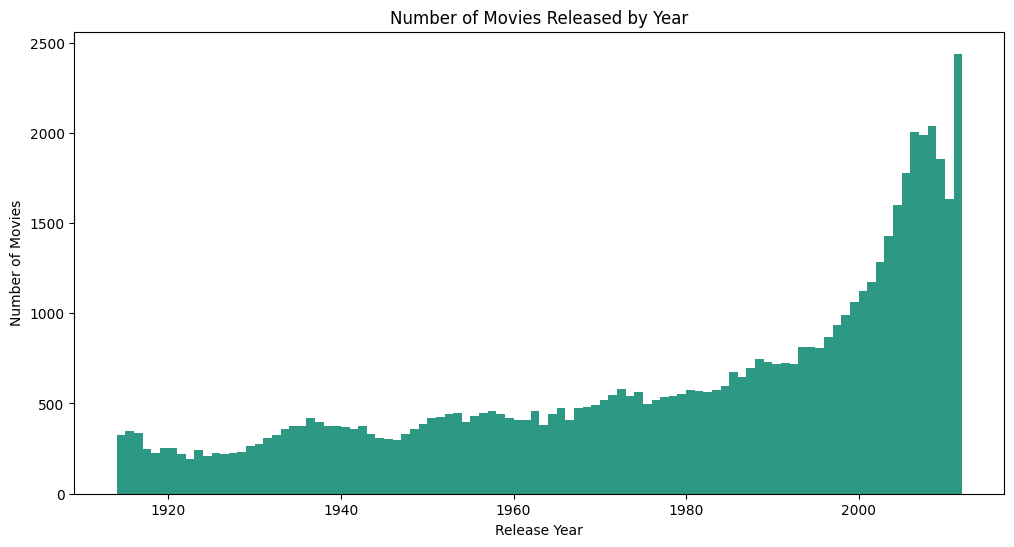

In [30]:
# plot the distribution of movies released by year
movies_per_year(movies_complete_df)

We can observe that the distribution of movies produced between 1910 until 2013 follows a heavy left-skewed distribution, with a notable increase since the 1990's.


# 3. Data Analysis

## A. Movie Directors

We are now diving straight into our theme by first looking at the gender distribution of movie directors.

In [41]:
# plot the distribution of genders amongst movie directors
plot_gender_distribution(movies_complete_df, 'director_gender')

**Analysis**

The number of movies in our dataset directed by a man is considerably higher than the ones directed by a woman. From this point on, we will mainly direct our analysis by comparing the result regarding the gender of the movie director in order to detect any tendancy.

## B. Female Actors / Characters

To pursue our analysis, we will focus on female representation within the movie industry. We will first look at the distribution of movie characters, and then link this data with specific features such as the age distribution, through time and space, as well as gender representation across movie genres.

### 1) Overview

In [43]:
# plot the distribution of genders amongst movie characters
plot_gender_distribution(movies_complete_df, 'actor_genders')

**Analysis**

This graph illustrates genre inequalities amongst actors. As we can see, overall only 1/3 of the actors are female. We will now compare and contrast gender inequalities amongst actors.

### 2) Age Distribution

In [44]:
# pre-processing the data
female_female_percentage, female_male_percentage = process_actor_age(movies_complete_df.explode(['actor_genders', 'actor_age']), 'F')
male_female_percentage, male_male_percentage = process_actor_age(movies_complete_df.explode(['actor_genders', 'actor_age']), 'M')

In [45]:
# plot each age distribution
fig = go.Figure()
age_actors_by_dir(fig, female_female_percentage, "Female Actors (Female Directors)", COLOR_FEMALE, 'solid')
age_actors_by_dir(fig, female_male_percentage, "Male Actors (Female Directors)", COLOR_FEMALE, 'dash')
age_actors_by_dir(fig, male_female_percentage, "Female Actors (Male Directors)", COLOR_MALE, 'solid')
age_actors_by_dir(fig, male_male_percentage, "Male Actors (Male Directors)", COLOR_MALE, 'dash')
age_actors_layout(fig)

**Analysis**

This graph illustrates the inequalities regarding opportunities given to older actors. Whereas the majority of male actors are between 30 and 50 years old, with an average of 40 years old, most women actors are only between 20 and 30 years old, with an average of 33 years old. The male actors seem to have a longer career than female ones.

### 3) Female Characters in movies

In [51]:
# plot female representation in movies by director
fem_representation_by_dir(movies_complete_df)

**Analysis**

Overall, Female Directors tend to represent more female actors than Male Directors. The proportion drastically dropped until 1942, with over a fourth of the characters represented by women. It then increased and stabilized at around 30-35%, where it steadily increased reaching 36% in 2013. Although the first half of the 20th Century was more unconclusive, World War II could be a reasonable explanation for it, since the 1980s, this tendancy seems to stabilize.

### 4) Across the globe

As primary investigation, we conducted a small analysis regarding the geographical provenance of the movies of our dataset as seen in part 2. We will now pursue our analysis by studying the average female representation in movies across the globe. 

In [ ]:
# representation of female characters in movies across the globe
map_M = map_fem_char(movies_complete_df[movies_complete_df["director_gender"] == "M"], "M")
map_F = map_fem_char(movies_complete_df[movies_complete_df["director_gender"] == "F"], "F")
# map_M.save("map_M.html")  # Save to file
# map_F.save("map_F.html")  # Save to file

**Analysis**
# TO DO AND TO RUN

### 5) Character distribution over movie genres

From our initial analysis, we obtained the following graph depicting the general tendancy of movies. From this distribution of movies by genre, we then selected the top-10 genres and looked at the gender distribution on them. 

In [52]:
# character gender representation across top-10 Genres
plot_top10_genres(movies_complete_df[movies_complete_df["director_gender"] == "M"], "Male")
plot_top10_genres(movies_complete_df[movies_complete_df["director_gender"] == "F"], "Female")

Overall, male representation is mainly represented across different movie genres. As expected, the number of female actors is overall higher if the movie director is a woman. For example, we can observe an increase of the number of female actors by 7-8% in the top-3 movie genres : Drama, Comedy and World Cinema. In both cases, the genre where women are the most represented is Romance.

In [53]:
# plot gender distribution of actors
genres_most_fem_char(movies_complete_df[movies_complete_df["director_gender"] == "M"], "Male", sort=False, title="Highest")
genres_most_fem_char(movies_complete_df[movies_complete_df["director_gender"] == "F"], "Female", sort=False, title="Highest")

genres_most_fem_char(movies_complete_df[movies_complete_df["director_gender"] == "M"], "Male", sort=True, title="Poorest")
genres_most_fem_char(movies_complete_df[movies_complete_df["director_gender"] == "F"], "Female", sort=True, title="Poorest")

**Analysis**

Interestingly, the movie genre in which female actors appear the most are related to sexuality : LGBTQ, Erotic and Adult Film and Romance, regardless of the gender of the movie director. This highlights how deeply ingrained the stereotypes of the sexualization of women are in society.

On the other side, male directors tend to have a percentage of female actors inferior to 25% when filming historical / western movies whereas female directors are more likely to cast more actresses in their movies (lowest average of 32.5% in Action movies).

## C. Role of Women in movies : Bechdel Test

### 1) Primary Analysis

In [65]:
# pre-processing of the data
df_bechdel_corr = process_bechdel_corr(movies_complete_df)

/Users/moi/Documents/EPFL/ADA2024/ada-2024-project-adapocalypse/src/utils/methods.py:147: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

/Users/moi/Documents/EPFL/ADA2024/ada-2024-project-adapocalypse/src/utils/methods.py:159: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.3120756380259991' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.

/Users/moi/Documents/EPFL/ADA2024/ada-2024-project-adapocalypse/src/utils/methods.py:159: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.26183164548128846' has dtype incompatible with int64, please explicitly cast to a compatible d

KeyboardInterrupt: 

In [59]:
bechdel_test_ratings_by_gender(df_bechdel_corr)

**Analysis**
# TO DO

In [ ]:
df_bechdel_corr = preprocessing_bechdel_for_correlation(movies_complete_df)

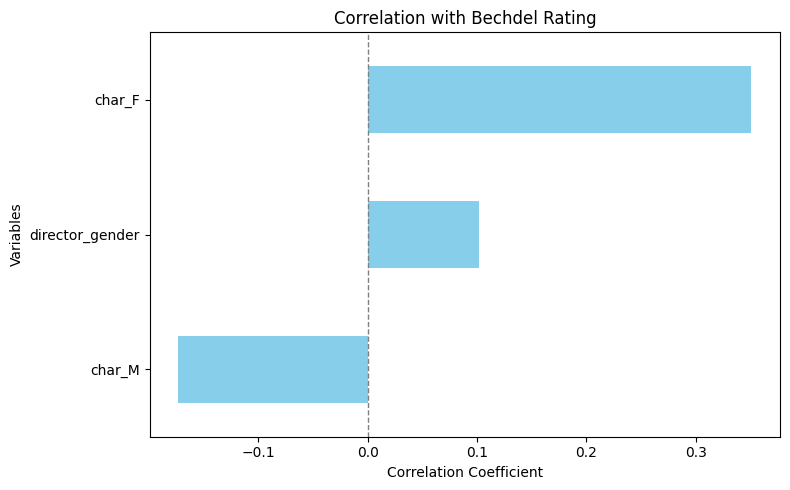

In [6]:
# plot the correlation between the bechdel test result and different features
corr_bechdel(df_bechdel_corr)

**Analysis**
# TO DO

### 2) When linked with sentiment analysis

In [14]:
df_plot_emotions = preprocessing_plot_emotions(movies_complete_df)

In [15]:
graph_emotions(df_plot_emotions)

**Analysis**
We see that more film summaries are categorised as including anger, whereas few contain joy or surprise. For further analysis, we want to investigate the potential relationship between the emotions and the genders of the main actors.

In [16]:
ratios_women, ratios_men = ratio_emotion_by_director_gender(df_plot_emotions)
graph_ratio_emotion_by_director_gender(ratios_women, ratios_men)

**Analysis**
We see a difference in the emotions present depending on the director's gender, particularly that of sadness, which is much more represented among women directors. On the opposite, men tend to represent anger, joy and fear more. However, some emotions are represented equally, such as disgust and surprise.

In [17]:
graph_ratio_emotion_radar_by_director_gender(ratios_women, ratios_men)

**Analysis**
This graph represents the same data as the previous one, but in a different form. Thanks to this radar graph, we can see that male and female directors do not represent exactly the same emotions on screen. 

### checker niveau couleurs quelles couleurs peps veut mettre (sûrement choisir l'autre violet, vert à adapter)
modifier directement les constantes pas de magic values

**Analysis**
# TO DO

### 3) Does your favorite movie pass the Bechdel Test ? - Logistic Regression

# EXPLICATION

In [18]:
y_test, y_pred_test, log_reg_model, X_train = logistic_regression_for_bechdel(movies_complete_df)

/Users/maximilien/Documents/DocumentsMac/EPFL/ADA/P3/ada-2024-project-adapocalypse/src/utils/methods.py:239: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

/Users/maximilien/Documents/DocumentsMac/EPFL/ADA/P3/ada-2024-project-adapocalypse/src/utils/methods.py:251: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.3120756380259991' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.

/Users/maximilien/Documents/DocumentsMac/EPFL/ADA/P3/ada-2024-project-adapocalypse/src/utils/methods.py:251: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.26183164548128846' has dtype incompat

The accuracy score for test set is: 0.6614950634696756
The accuracy score for train set is: 0.7208892025405786


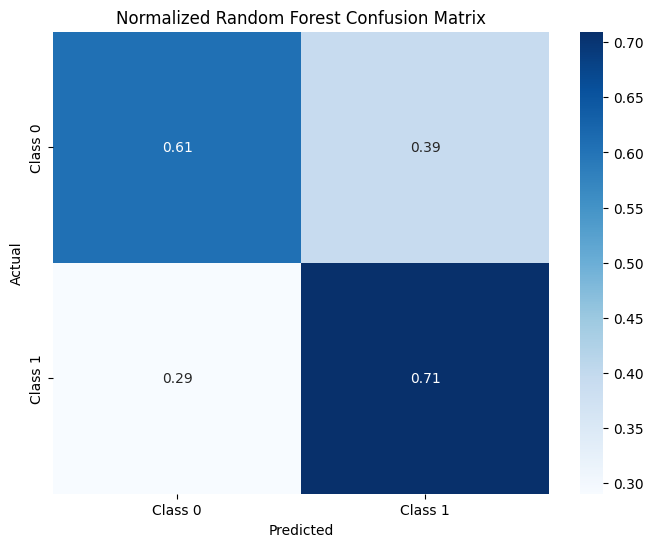

In [12]:
plot_confusion_matrix(y_test, y_pred_test)


# TO RUN AND ANALYSIS

In [13]:
feature_importance(log_reg_model, X_train)

Feature  Coefficient  Importance
7       char_F     1.112821    1.112821
6       char_M    -0.669825    0.669825
34    Feminist     0.405446    0.405446
100      Egypt     0.251107    0.251107
91      Serbia    -0.246478    0.246478
..         ...          ...         ...
111     Greece     0.000000    0.000000
71         nan     0.000000    0.000000
120   Cameroon     0.000000    0.000000
106  Singapore     0.000000    0.000000
70         nan     0.000000    0.000000

[139 rows x 3 columns]

**Analysis**
# TO DO

# RUN ET INDIQUER RÉSULTATS

## D. TV TROPES

In [67]:
filtered_tropes, genderedness_df = preprocess_tvtropes(movies_complete_df) # to do once to generate the csv file

Loaded data from data/raw/tvtropes.clusters.txt, shape: (500, 2)
Loaded data from src/data/external_data/film_tropes.csv, shape: (751594, 6)
Loaded data from src/data/external_data/genderedness_filtered.csv, shape: (20931, 9)


In [68]:
final_tropes_F = get_dominant_tropes(filtered_tropes, genderedness_df, dominant="FemaleTokens", non_dominant="MaleTokens")
print(f"Female tropes mostly represented:\n", final_tropes_F["Trope"])

Female tropes mostly represented:
 0           FinalGirl
1          BrokenBird
2          DumbBlonde
3     BrainlessBeauty
4          ValleyGirl
5    ClassyCatBurglar
Name: Trope, dtype: object


In [69]:
final_tropes_M = get_dominant_tropes(filtered_tropes, genderedness_df, dominant="MaleTokens", non_dominant="FemaleTokens")
print(f"Male tropes mostly represented:\n", final_tropes_M.head(6)["Trope"])

Male tropes mostly represented:
 0                     DirtyCop
1                  ByronicHero
2                PsychoForHire
3             HenpeckedHusband
4              MasterSwordsman
5    CorruptCorporateExecutive
Name: Trope, dtype: object


In [70]:
# pre-processing of the data
male_director_data, female_director_data = preprocessing_final_tropes(final_tropes_F, final_tropes_M)

In [75]:
# plot trop distribution by movie director gender
plot_director_trope_pie_charts(male_director_data, female_director_data)

# MODIF COULEURS ICI

**Analysis**

Interestingly, male directors tends to represent more masculin tv tropes than feminin ones, which can be simply explained by the fact that the distribution of actresses within movies produced by male directors is significantly low. In comparison, female directors tends to represent more or less equally stereotypes regarding each gender.

## E. Public and Financial Recognition

### 1) Public Recognition

In [178]:
movies_complete_df.groupby('director_gender')['num_votes'].describe()

count          mean           std   min    25%     50%  \
director_gender                                                             
F                 3035.0  10206.587479  39639.966169  51.0  262.0  1025.0   
M                29137.0  21235.584274  94004.888879  51.0  371.0  1293.0   

                    75%        max  
director_gender                     
F                4227.0   745178.0  
M                5981.0  2952726.0

By computing statistics proportional to the number of movies directed by each gender, we observe a consequent difference regarding the number of votes attributed to movie amongst genders. On average, movies directed by men will receive twice the amount of ratings compared to movies directed by women. This parameter is although not resistant against extreme values. By comparing the median, we observe a smaller difference.

In [76]:
# plot the average rating of movies by director gender
avg_rating(movies_complete_df)

The movies directed by women seem to be interestingly better rated than the ones directed by men, which demonstrates more public interest in movies directed by women.

We will now compare the ratings of distinct groups of movies defined according to specific conditions. The goal of this analysis is to create two categories : the movies that pass the Bechdel test and having a consequent female representation amongst their actors (> 35%) vs the movies that failed the Bechdel test (<= 2) and have a poor female representation (<= 35%)

In [77]:
# pre-processing of data - "optimal" & "worst" group
optimal_df = group_formation(movies_complete_df, opti=True)
worst_df = group_formation(movies_complete_df, opti=False)

# on constate que les genres de chaque groupe sont représentatifs des genres les plus réalisés
dans les worst, ncp plus de films "action", "aventure" et "thriller" qui sont les gens les - 

In [222]:
optimal_df['director_gender'].value_counts()

director_gender
M    1113
F     226
Name: count, dtype: int64

In [223]:
worst_df['director_gender'].value_counts()

director_gender
M    1187
F      53
Name: count, dtype: int64

Interestingly, around 31% of the movie directors which movie is considered "optimal" are female whereas only 4,7% of the movie directors which movie is considered "worst" are female.

In [78]:
# average rating of movies belonging to the optimal group
avg_rating_groups(optimal_df)

**Analysis**

Overall, movies that complete the Bechdel test and have a consequent number of female actresses are better ranked if they are directed by a man. 
# TO FINISH

In [79]:
# average rating of movies belonging to the worst group
avg_rating_groups(worst_df)

**Analysis**

Interestingly, movies that fail the Bechdel test and have a poor female representaiton in terms of actors tend to be better ranked when directed by a woman.

# TO FINISH

We can now wonder whether such difference is also depicted in the economical success of the movie ?

### 2) Relation between Public and Financial Recognition

In [80]:
# plot the box office revenue in function of the average rating of movies
avg_box_office(movies_complete_df)

**Analysis**
Focusing on female directors, the average rating of a movie does not seem to correlate with the box office revenue as the revenue seems to oscillate between 0 and 500 millions dollars independantly of the rating. Although, we can notice that movies rated less than 4.5 / 10 tend to have a smaller revenue.

Focusing on male directors, the range of box office revenue seems to divide into 3 groups :
- "terrible" movies, rated less than 4/10 majoritarily obtain a "small" box-office revenue, inferior to 100M
- "poorly-rated" movies, rated between 4 and 6/10, tend to be financially rewarded with a revenue inferior than 500M although there are a few outliers
- "well-rated" movies, rated over 6/10, tend to have a more extended range of box office revenues

There is thus not a clear correlation between the two variables, although we can affirm that movies directed by men tends to obtain a bigger financial revenue.

In [ ]:
# By gender
for gender in movies_complete_df['director_gender'].unique():
    subset = movies_complete_df[movies_complete_df['director_gender'] == gender]
    pearson_corr, pearson_p = pearsonr(subset["average_rating"], subset["box_office_revenue"])
    spearman_corr, spearman_p = spearmanr(subset["average_rating"], subset["box_office_revenue"])
    print(f"{gender} Directors:")
    print(f"  - Pearson Correlation: {pearson_corr:.2f} with p-value:{pearson_p}")
    print(f"  - Spearman Correlation: {spearman_corr:.2f} with p-value:{spearman_p}")
    avg_box_office(movies_complete_df.dropna(subset=["revenue", "average_rating"]))

### 3) Rendement

To complete our analysis, we collected the budget of a large amount of movies of our database and calculated their rendement by calculating the ratio between the box office revenue and the budget of the movie. By doing so, we intend to uncover more disparities regarding economical success and gender of the movie director.

In [81]:
# plotting the budget through the years
budget_through_years(movies_complete_df)

**Analysis**

Overall, the budget allocated to movies has significantly increased since the 1970s. Although, the financial means of movies directed by a man are clearly superior to movies direct by a woman.

In [ ]:
 # Calculate correlations for each gender
for gender in movies_complete_df['director_gender'].unique():
    subset = movies_complete_df[movies_complete_df['director_gender'] == gender]
    pearson_corr, pearson_p = pearsonr(subset["movie_release_date"], subset["movie_budget"])
    spearman_corr, spearman_p = spearmanr(subset["movie_release_date"], subset["movie_budget"])
    print(f"{gender} Directors:")
    print(f"  - Pearson Correlation: {pearson_corr:.2f} with p-value: {pearson_p}")
    print(f"  - Spearman Correlation: {spearman_corr:.2f} with p-value: {spearman_p}")
budget_through_years(movies_complete_df.dropna(subset=["budget", "movie_release_date"]))

Let's pursue the analysis by bringing back the "optimal" and "worse" groups and performing statistical analysis on rendement on these.

In [82]:
optimal_df['movie_rendement'] = optimal_df['box_office_revenue'] / optimal_df['movie_budget']
worst_df['movie_rendement'] = worst_df['box_office_revenue'] / worst_df['movie_budget']

In [88]:
# rendement of the Optimal group
rendement_groups(optimal_df, "Optimal") # prior removal of outliers

**Analysis**
# TO DO

In [89]:
# plot rendement of the worst group
rendement_groups(worst_df, "Worst") # prior removal of outliers

**Analysis**
# TO DO

# FROM HERE TV TROPES STUFF

## 2.2. CHARACTER TYPES

Here, we separate the columns so it is more easy to understand.

We add the character information and especially its gender.

In [ ]:
tvtropes_df['actor_gender'] = tvtropes_df['actor_name'].map(char_metadata_df.set_index('actor_name')['actor_gender'].to_dict())


We count the number of female and male characters. There is much more males, which introduces some bias in our analysis. We are not sure if we want to use this file since it could contain biased information about genders, and the file is only 500 rows so it is quite small.

We plot the repartition of the gender characters along the tv tropes.

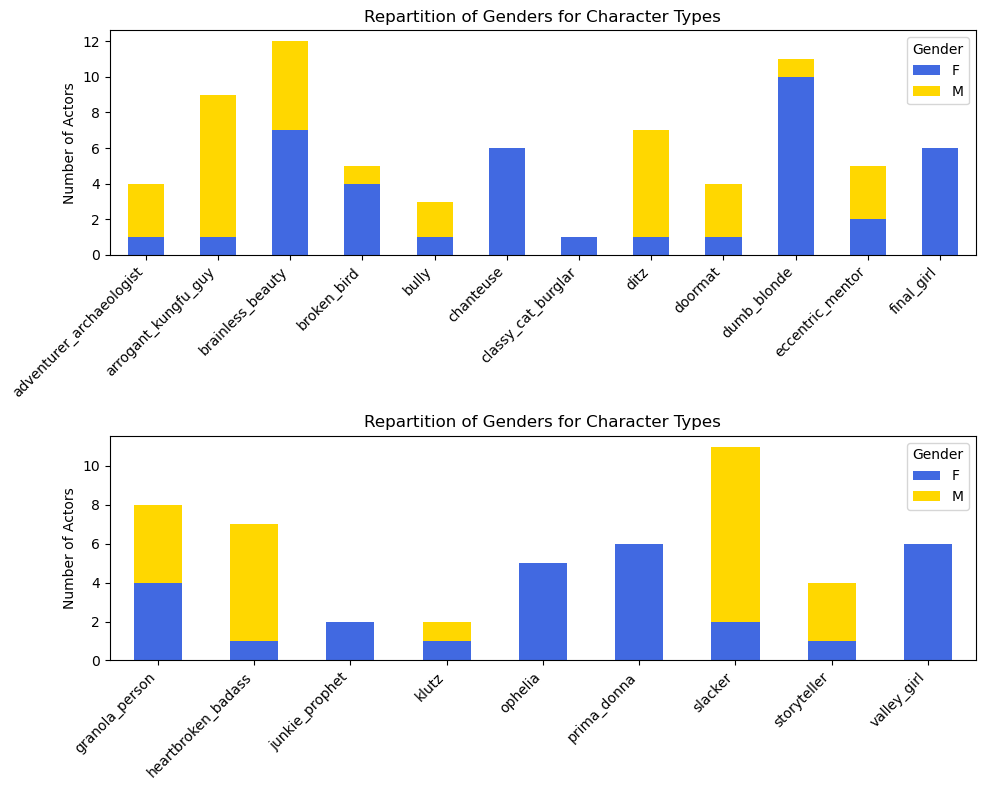

In [ ]:
# Filter rows where 'actor_gender' contains 'F'
character_type_gender_counts = tvtropes_df.groupby(['character_type', 'actor_gender']).size().unstack(fill_value=0)
filtered_character_type_gender_counts = character_type_gender_counts[character_type_gender_counts['F'] > 0]

In [ ]:
# plot repartition of gendes for character types
gender_char_types(filtered_character_type_gender_counts, "Number of Actors", "Repartition of Genders for Character Types")

Here, we only plotted the categories that have some female characters. As expected following societal cliches, female characters are often juged based on their appearance (ex :"dumb blond") whereas more flatterous characters are predominantly males such as "byronic_hero" or "master_swodsman". Some categories are 100% female characters: chanteuse, final_girl, ophelia, prima_donna, valley_girl. Indeed, some genders word are contained in the title of the tv tropes. As for the category brainless beauty, we observe it is almost 50-50 but considering there is really less female characters, it is obvious to see that it is disproportionate.